Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

Load Data

In [3]:
data = pd.read_csv("loan_approval_dataset.csv")

In [4]:
data

loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1         12200000           8           417                    2700000   
2         29700000          20           506                    7100000   
3         30700000           8           467                   18200000   
4         24200000          20           382                   12400000   
...            ...         ...           ...                        ...   
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
0        Approved  
1        Rejected  
2        Rejected  
3        Rejected  
4        Rejected  
...           ...  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved  

[4269 rows x 13 columns]

In [5]:
data.columns = data.columns.str.strip()

In [6]:
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [7]:
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
data['Assets'] = data.residential_assets_value+data.commercial_assets_value+data.luxury_assets_value+data.bank_asset_value

In [9]:
data.drop(columns = ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value'], inplace = True)

In [10]:
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'loan_status', 'Assets'],
      dtype='object')

In [11]:
data.isnull().sum()

loan_id             0
no_of_dependents    0
education           0
self_employed       0
income_annum        0
loan_amount         0
loan_term           0
cibil_score         0
loan_status         0
Assets              0
dtype: int64

In [12]:
data

loan_id  no_of_dependents      education self_employed  income_annum  \
0           1                 2       Graduate            No       9600000   
1           2                 0   Not Graduate           Yes       4100000   
2           3                 3       Graduate            No       9100000   
3           4                 3       Graduate            No       8200000   
4           5                 5   Not Graduate           Yes       9800000   
...       ...               ...            ...           ...           ...   
4264     4265                 5       Graduate           Yes       1000000   
4265     4266                 0   Not Graduate           Yes       3300000   
4266     4267                 2   Not Graduate            No       6500000   
4267     4268                 1   Not Graduate            No       4100000   
4268     4269                 1       Graduate            No       9200000   

      loan_amount  loan_term  cibil_score loan_status    Assets  
0        29900000         12          778    Approved  50700000  
1        12200000          8          417    Rejected  17000000  
2        29700000         20          506    Rejected  57700000  
3        30700000          8          467    Rejected  52700000  
4        24200000         20          382    Rejected  55000000  
...           ...        ...          ...         ...       ...  
4264      2300000         12          317    Rejected   7400000  
4265     11300000         20          559    Approved  20000000  
4266     23900000         18          457    Rejected  39000000  
4267     12800000          8          780    Approved  28800000  
4268     29700000         10          607    Approved  77300000  

[4269 rows x 10 columns]

In [13]:
data.education.unique()

array([' Graduate', ' Not Graduate'], dtype=object)

Data Cleaning

In [14]:
def clean_data(st):
    st = st.strip()
    return st

In [15]:
clean_data(' Graduate')

'Graduate'

In [16]:
data.education = data.education.apply(clean_data)

In [17]:
data.education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [18]:
data['education'] = data['education'].replace(['Graduate', 'Not Graduate'],[1,0])

In [19]:
data

loan_id  no_of_dependents  education self_employed  income_annum  \
0           1                 2          1            No       9600000   
1           2                 0          0           Yes       4100000   
2           3                 3          1            No       9100000   
3           4                 3          1            No       8200000   
4           5                 5          0           Yes       9800000   
...       ...               ...        ...           ...           ...   
4264     4265                 5          1           Yes       1000000   
4265     4266                 0          0           Yes       3300000   
4266     4267                 2          0            No       6500000   
4267     4268                 1          0            No       4100000   
4268     4269                 1          1            No       9200000   

      loan_amount  loan_term  cibil_score loan_status    Assets  
0        29900000         12          778    Approved  50700000  
1        12200000          8          417    Rejected  17000000  
2        29700000         20          506    Rejected  57700000  
3        30700000          8          467    Rejected  52700000  
4        24200000         20          382    Rejected  55000000  
...           ...        ...          ...         ...       ...  
4264      2300000         12          317    Rejected   7400000  
4265     11300000         20          559    Approved  20000000  
4266     23900000         18          457    Rejected  39000000  
4267     12800000          8          780    Approved  28800000  
4268     29700000         10          607    Approved  77300000  

[4269 rows x 10 columns]

In [20]:
data.self_employed.unique()

array([' No', ' Yes'], dtype=object)

In [21]:
data.self_employed = data.self_employed.apply(clean_data)

In [22]:
data.self_employed.unique()

array(['No', 'Yes'], dtype=object)

In [23]:
data.self_employed = data.self_employed.replace(['No', 'Yes'],[0,1])

In [24]:
data

loan_id  no_of_dependents  education  self_employed  income_annum  \
0           1                 2          1              0       9600000   
1           2                 0          0              1       4100000   
2           3                 3          1              0       9100000   
3           4                 3          1              0       8200000   
4           5                 5          0              1       9800000   
...       ...               ...        ...            ...           ...   
4264     4265                 5          1              1       1000000   
4265     4266                 0          0              1       3300000   
4266     4267                 2          0              0       6500000   
4267     4268                 1          0              0       4100000   
4268     4269                 1          1              0       9200000   

      loan_amount  loan_term  cibil_score loan_status    Assets  
0        29900000         12          778    Approved  50700000  
1        12200000          8          417    Rejected  17000000  
2        29700000         20          506    Rejected  57700000  
3        30700000          8          467    Rejected  52700000  
4        24200000         20          382    Rejected  55000000  
...           ...        ...          ...         ...       ...  
4264      2300000         12          317    Rejected   7400000  
4265     11300000         20          559    Approved  20000000  
4266     23900000         18          457    Rejected  39000000  
4267     12800000          8          780    Approved  28800000  
4268     29700000         10          607    Approved  77300000  

[4269 rows x 10 columns]

In [25]:
data.loan_status.unique()

array([' Approved', ' Rejected'], dtype=object)

In [26]:
data.loan_status = data.loan_status.apply(clean_data)

In [27]:
data.loan_status.unique()

array(['Approved', 'Rejected'], dtype=object)

In [28]:
data.loan_status = data.loan_status.replace(['Approved', 'Rejected'],[1,0])

In [29]:
data

loan_id  no_of_dependents  education  self_employed  income_annum  \
0           1                 2          1              0       9600000   
1           2                 0          0              1       4100000   
2           3                 3          1              0       9100000   
3           4                 3          1              0       8200000   
4           5                 5          0              1       9800000   
...       ...               ...        ...            ...           ...   
4264     4265                 5          1              1       1000000   
4265     4266                 0          0              1       3300000   
4266     4267                 2          0              0       6500000   
4267     4268                 1          0              0       4100000   
4268     4269                 1          1              0       9200000   

      loan_amount  loan_term  cibil_score  loan_status    Assets  
0        29900000         12          778            1  50700000  
1        12200000          8          417            0  17000000  
2        29700000         20          506            0  57700000  
3        30700000          8          467            0  52700000  
4        24200000         20          382            0  55000000  
...           ...        ...          ...          ...       ...  
4264      2300000         12          317            0   7400000  
4265     11300000         20          559            1  20000000  
4266     23900000         18          457            0  39000000  
4267     12800000          8          780            1  28800000  
4268     29700000         10          607            1  77300000  

[4269 rows x 10 columns]

Adding Missing Values

In [30]:
def add_random_missing_values(df, missing_fraction=0.06):
    df = df.copy()  
    num_missing = int(missing_fraction * df.size)  
    indices = [(row, col) for row in range(df.shape[0]) for col in range(df.shape[1])]
    missing_indices = np.random.choice(len(indices), num_missing, replace=False)  
    
    for idx in missing_indices:
        row, col = indices[idx] 
        df.iloc[row, col] = np.nan 
    
    return df



In [31]:
data_with_missing = add_random_missing_values(data, missing_fraction=0.1)

In [32]:
print(data_with_missing)

      loan_id  no_of_dependents  education  self_employed  income_annum  \
0         1.0               2.0        1.0            0.0     9600000.0   
1         2.0               0.0        0.0            1.0     4100000.0   
2         3.0               3.0        1.0            0.0     9100000.0   
3         4.0               3.0        1.0            0.0     8200000.0   
4         NaN               5.0        0.0            NaN     9800000.0   
...       ...               ...        ...            ...           ...   
4264   4265.0               5.0        1.0            1.0     1000000.0   
4265   4266.0               0.0        0.0            1.0     3300000.0   
4266   4267.0               2.0        0.0            0.0     6500000.0   
4267   4268.0               1.0        0.0            0.0     4100000.0   
4268   4269.0               1.0        1.0            0.0     9200000.0   

      loan_amount  loan_term  cibil_score  loan_status      Assets  
0      29900000.0       12.0  

In [33]:
data = data.astype(float)

Imputing missing values using Imputer

In [34]:
imputer = SimpleImputer(strategy="constant", fill_value=np.nan)
data_filled = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [35]:
data_mean = data_with_missing.copy()
data_mode = data_with_missing.copy()
data_min = data_with_missing.copy()
data_max = data_with_missing.copy()
data_std = data_with_missing.copy()
data_var = data_with_missing.copy()


In [36]:
imputer_mean = SimpleImputer(strategy='mean')  
imputer_mode = SimpleImputer(strategy='most_frequent')  
imputer_min = SimpleImputer(strategy='constant', fill_value=data_with_missing.min(numeric_only=True).min())  
imputer_max = SimpleImputer(strategy='constant', fill_value=data_with_missing.max(numeric_only=True).max())  
imputer_std = SimpleImputer(strategy='constant', fill_value=data_with_missing.std(numeric_only=True).mean())  
imputer_var = SimpleImputer(strategy='constant', fill_value=data_with_missing.var(numeric_only=True).mean())  

In [37]:
data_mean[:] = imputer_mean.fit_transform(data_mean)
data_mode[:] = imputer_mode.fit_transform(data_mode)
data_min[:] = imputer_min.fit_transform(data_min)
data_max[:] = imputer_max.fit_transform(data_max)
data_std[:] = imputer_std.fit_transform(data_std)
data_var[:] = imputer_var.fit_transform(data_var)

In [38]:
print("Mean Imputed Dataset:\n", data_mean)
print("Mode Imputed Dataset:\n", data_mode)
print("Min Imputed Dataset:\n", data_min)
print("Max Imputed Dataset:\n", data_max)
print("Std Imputed Dataset:\n", data_std)
print("Var Imputed Dataset:\n", data_var)

Mean Imputed Dataset:
           loan_id  no_of_dependents  education  self_employed  income_annum  \
0        1.000000               2.0        1.0       0.000000     9600000.0   
1        2.000000               0.0        0.0       1.000000     4100000.0   
2        3.000000               3.0        1.0       0.000000     9100000.0   
3        4.000000               3.0        1.0       0.000000     8200000.0   
4     2131.231615               5.0        0.0       0.502592     9800000.0   
...           ...               ...        ...            ...           ...   
4264  4265.000000               5.0        1.0       1.000000     1000000.0   
4265  4266.000000               0.0        0.0       1.000000     3300000.0   
4266  4267.000000               2.0        0.0       0.000000     6500000.0   
4267  4268.000000               1.0        0.0       0.000000     4100000.0   
4268  4269.000000               1.0        1.0       0.000000     9200000.0   

      loan_amount  loan_term

In [39]:
datasets = [data_mean, data_mode, data_min, data_max, data_std, data_var]

In [40]:
datasets

[          loan_id  no_of_dependents  education  self_employed  income_annum  \
 0        1.000000               2.0        1.0       0.000000     9600000.0   
 1        2.000000               0.0        0.0       1.000000     4100000.0   
 2        3.000000               3.0        1.0       0.000000     9100000.0   
 3        4.000000               3.0        1.0       0.000000     8200000.0   
 4     2131.231615               5.0        0.0       0.502592     9800000.0   
 ...           ...               ...        ...            ...           ...   
 4264  4265.000000               5.0        1.0       1.000000     1000000.0   
 4265  4266.000000               0.0        0.0       1.000000     3300000.0   
 4266  4267.000000               2.0        0.0       0.000000     6500000.0   
 4267  4268.000000               1.0        0.0       0.000000     4100000.0   
 4268  4269.000000               1.0        1.0       0.000000     9200000.0   
 
       loan_amount  loan_term  cibil_s

Encoding categorical data

In [41]:
label_encoder = LabelEncoder()
for dataset in datasets:
    for column in dataset.select_dtypes(include=['object']).columns:
        dataset[column] = label_encoder.fit_transform(dataset[column])

In [42]:
datasets

[          loan_id  no_of_dependents  education  self_employed  income_annum  \
 0        1.000000               2.0        1.0       0.000000     9600000.0   
 1        2.000000               0.0        0.0       1.000000     4100000.0   
 2        3.000000               3.0        1.0       0.000000     9100000.0   
 3        4.000000               3.0        1.0       0.000000     8200000.0   
 4     2131.231615               5.0        0.0       0.502592     9800000.0   
 ...           ...               ...        ...            ...           ...   
 4264  4265.000000               5.0        1.0       1.000000     1000000.0   
 4265  4266.000000               0.0        0.0       1.000000     3300000.0   
 4266  4267.000000               2.0        0.0       0.000000     6500000.0   
 4267  4268.000000               1.0        0.0       0.000000     4100000.0   
 4268  4269.000000               1.0        1.0       0.000000     9200000.0   
 
       loan_amount  loan_term  cibil_s

Scaling

In [43]:
scaler = MinMaxScaler()
for dataset in datasets:
    dataset[:] = scaler.fit_transform(dataset)

Ploting and Finding Correlation Heatmaps

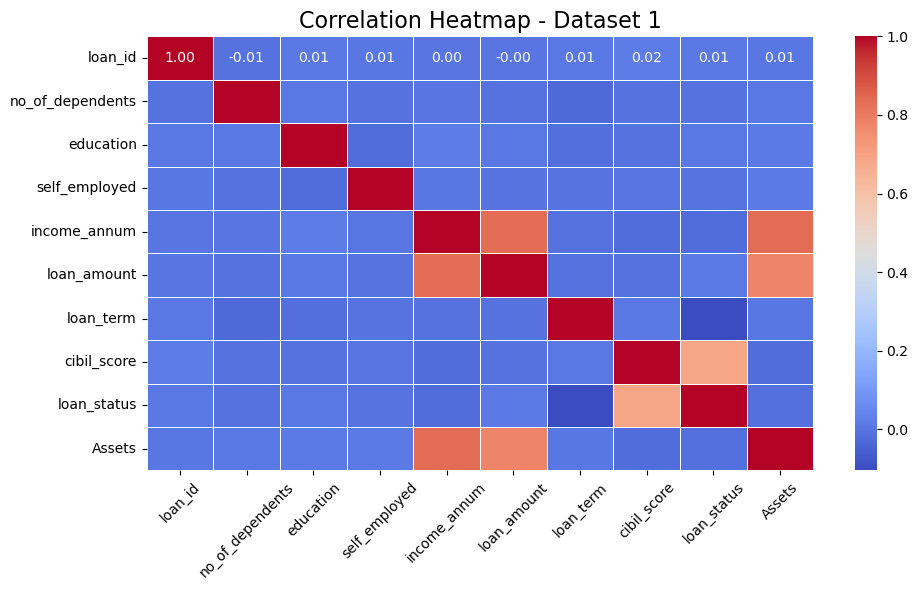

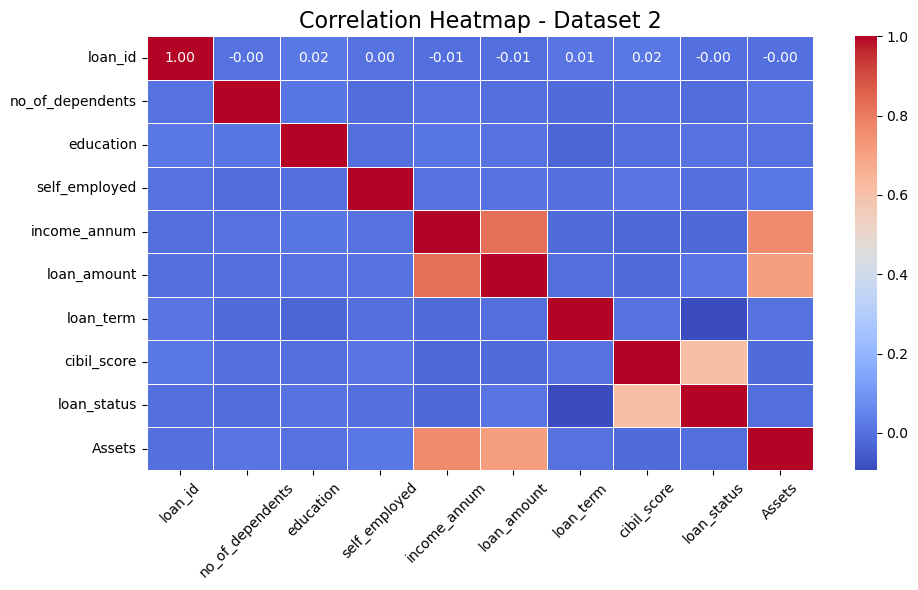

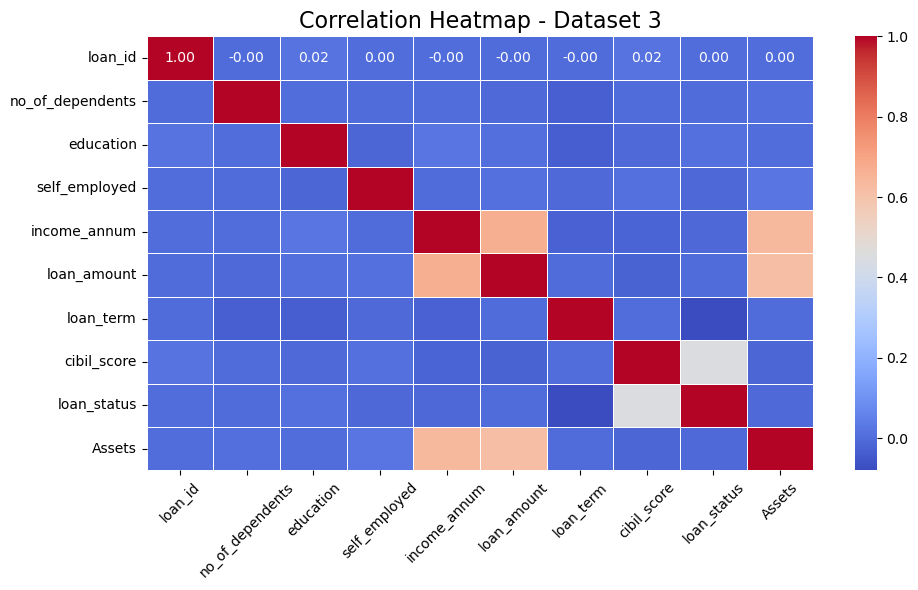

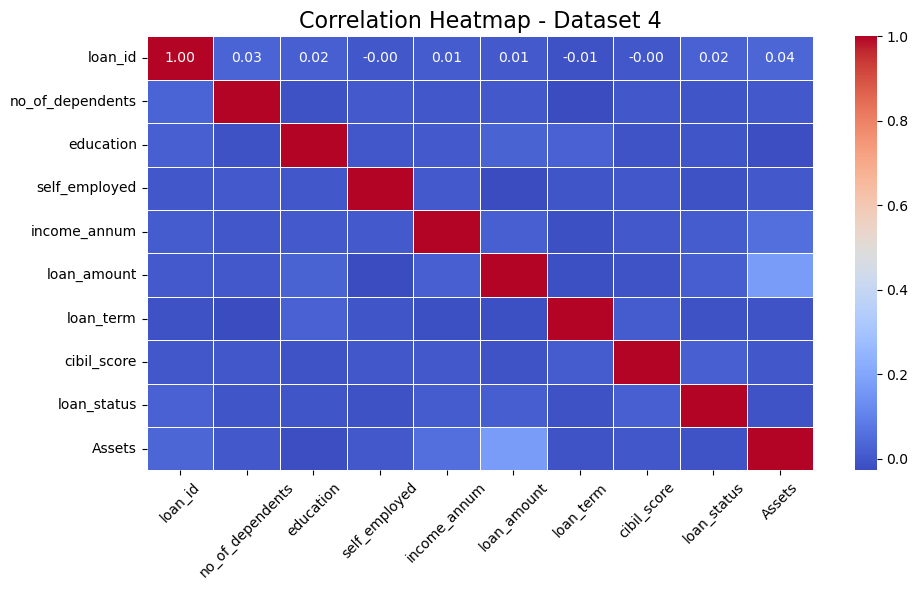

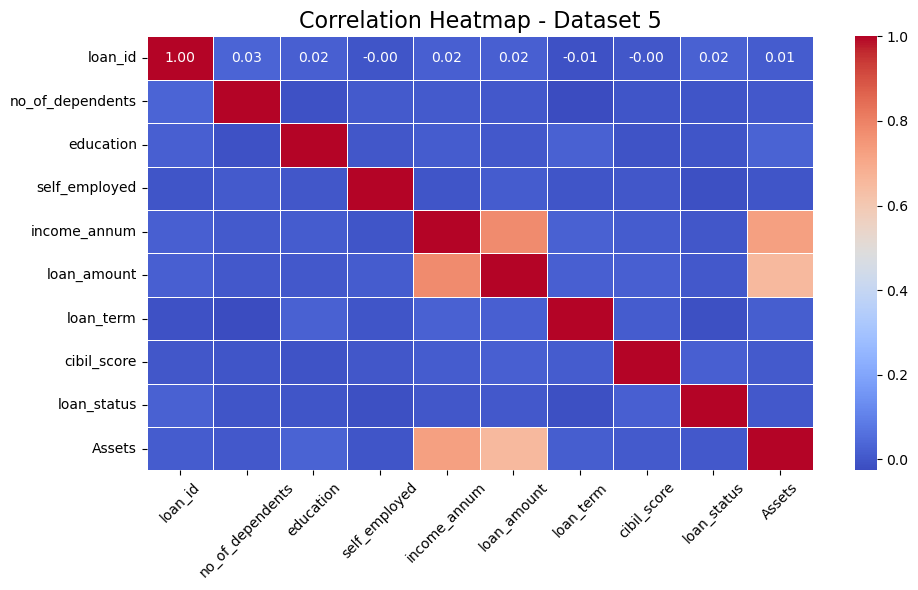

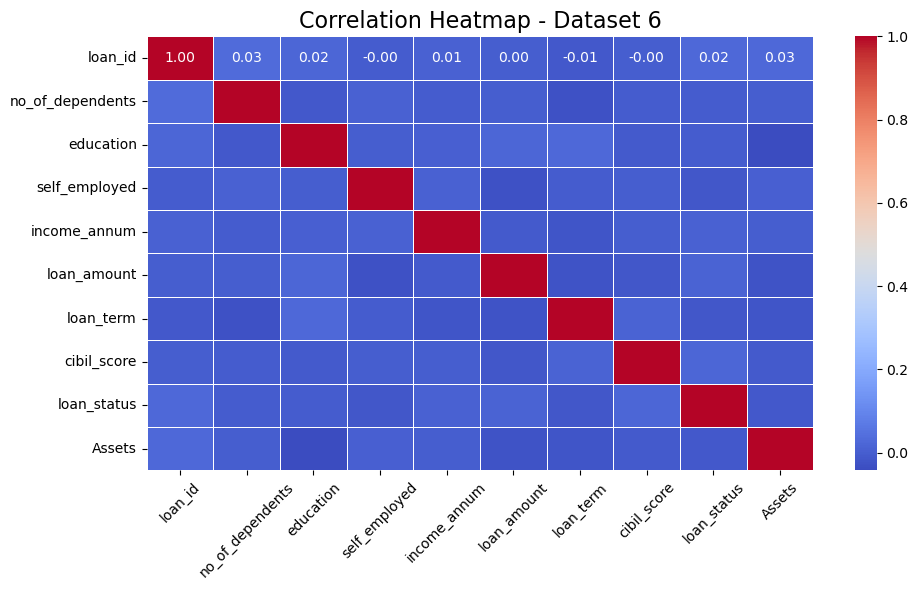

In [44]:
for i, dataset in enumerate(datasets):
    plt.figure(figsize=(10, 6))
    corr_matrix = dataset.corr()  
    heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f"Correlation Heatmap - Dataset {i+1}", fontsize=16)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()  
    plt.show()
    # corr_matrix = dataset.corr()
    # upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    # to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > abs(0.75))]
    # print(f"Columns dropped for {to_drop}")
    # dataset.drop(columns=to_drop, inplace=True)

Ploting Histogram

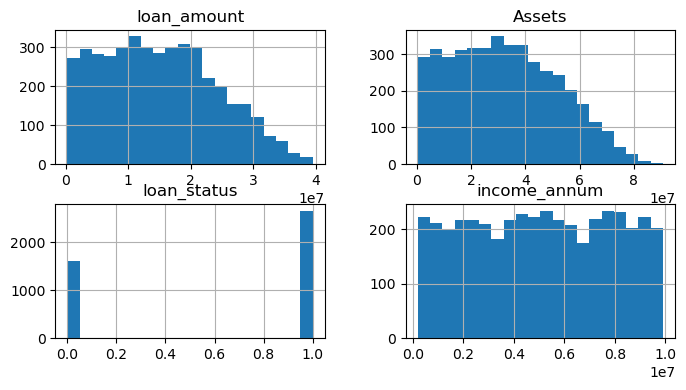

In [45]:
data[['loan_amount', 'Assets', 'loan_status','income_annum']].hist(bins=20, figsize=(8, 4))
plt.show()


Ploting Feature relations

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

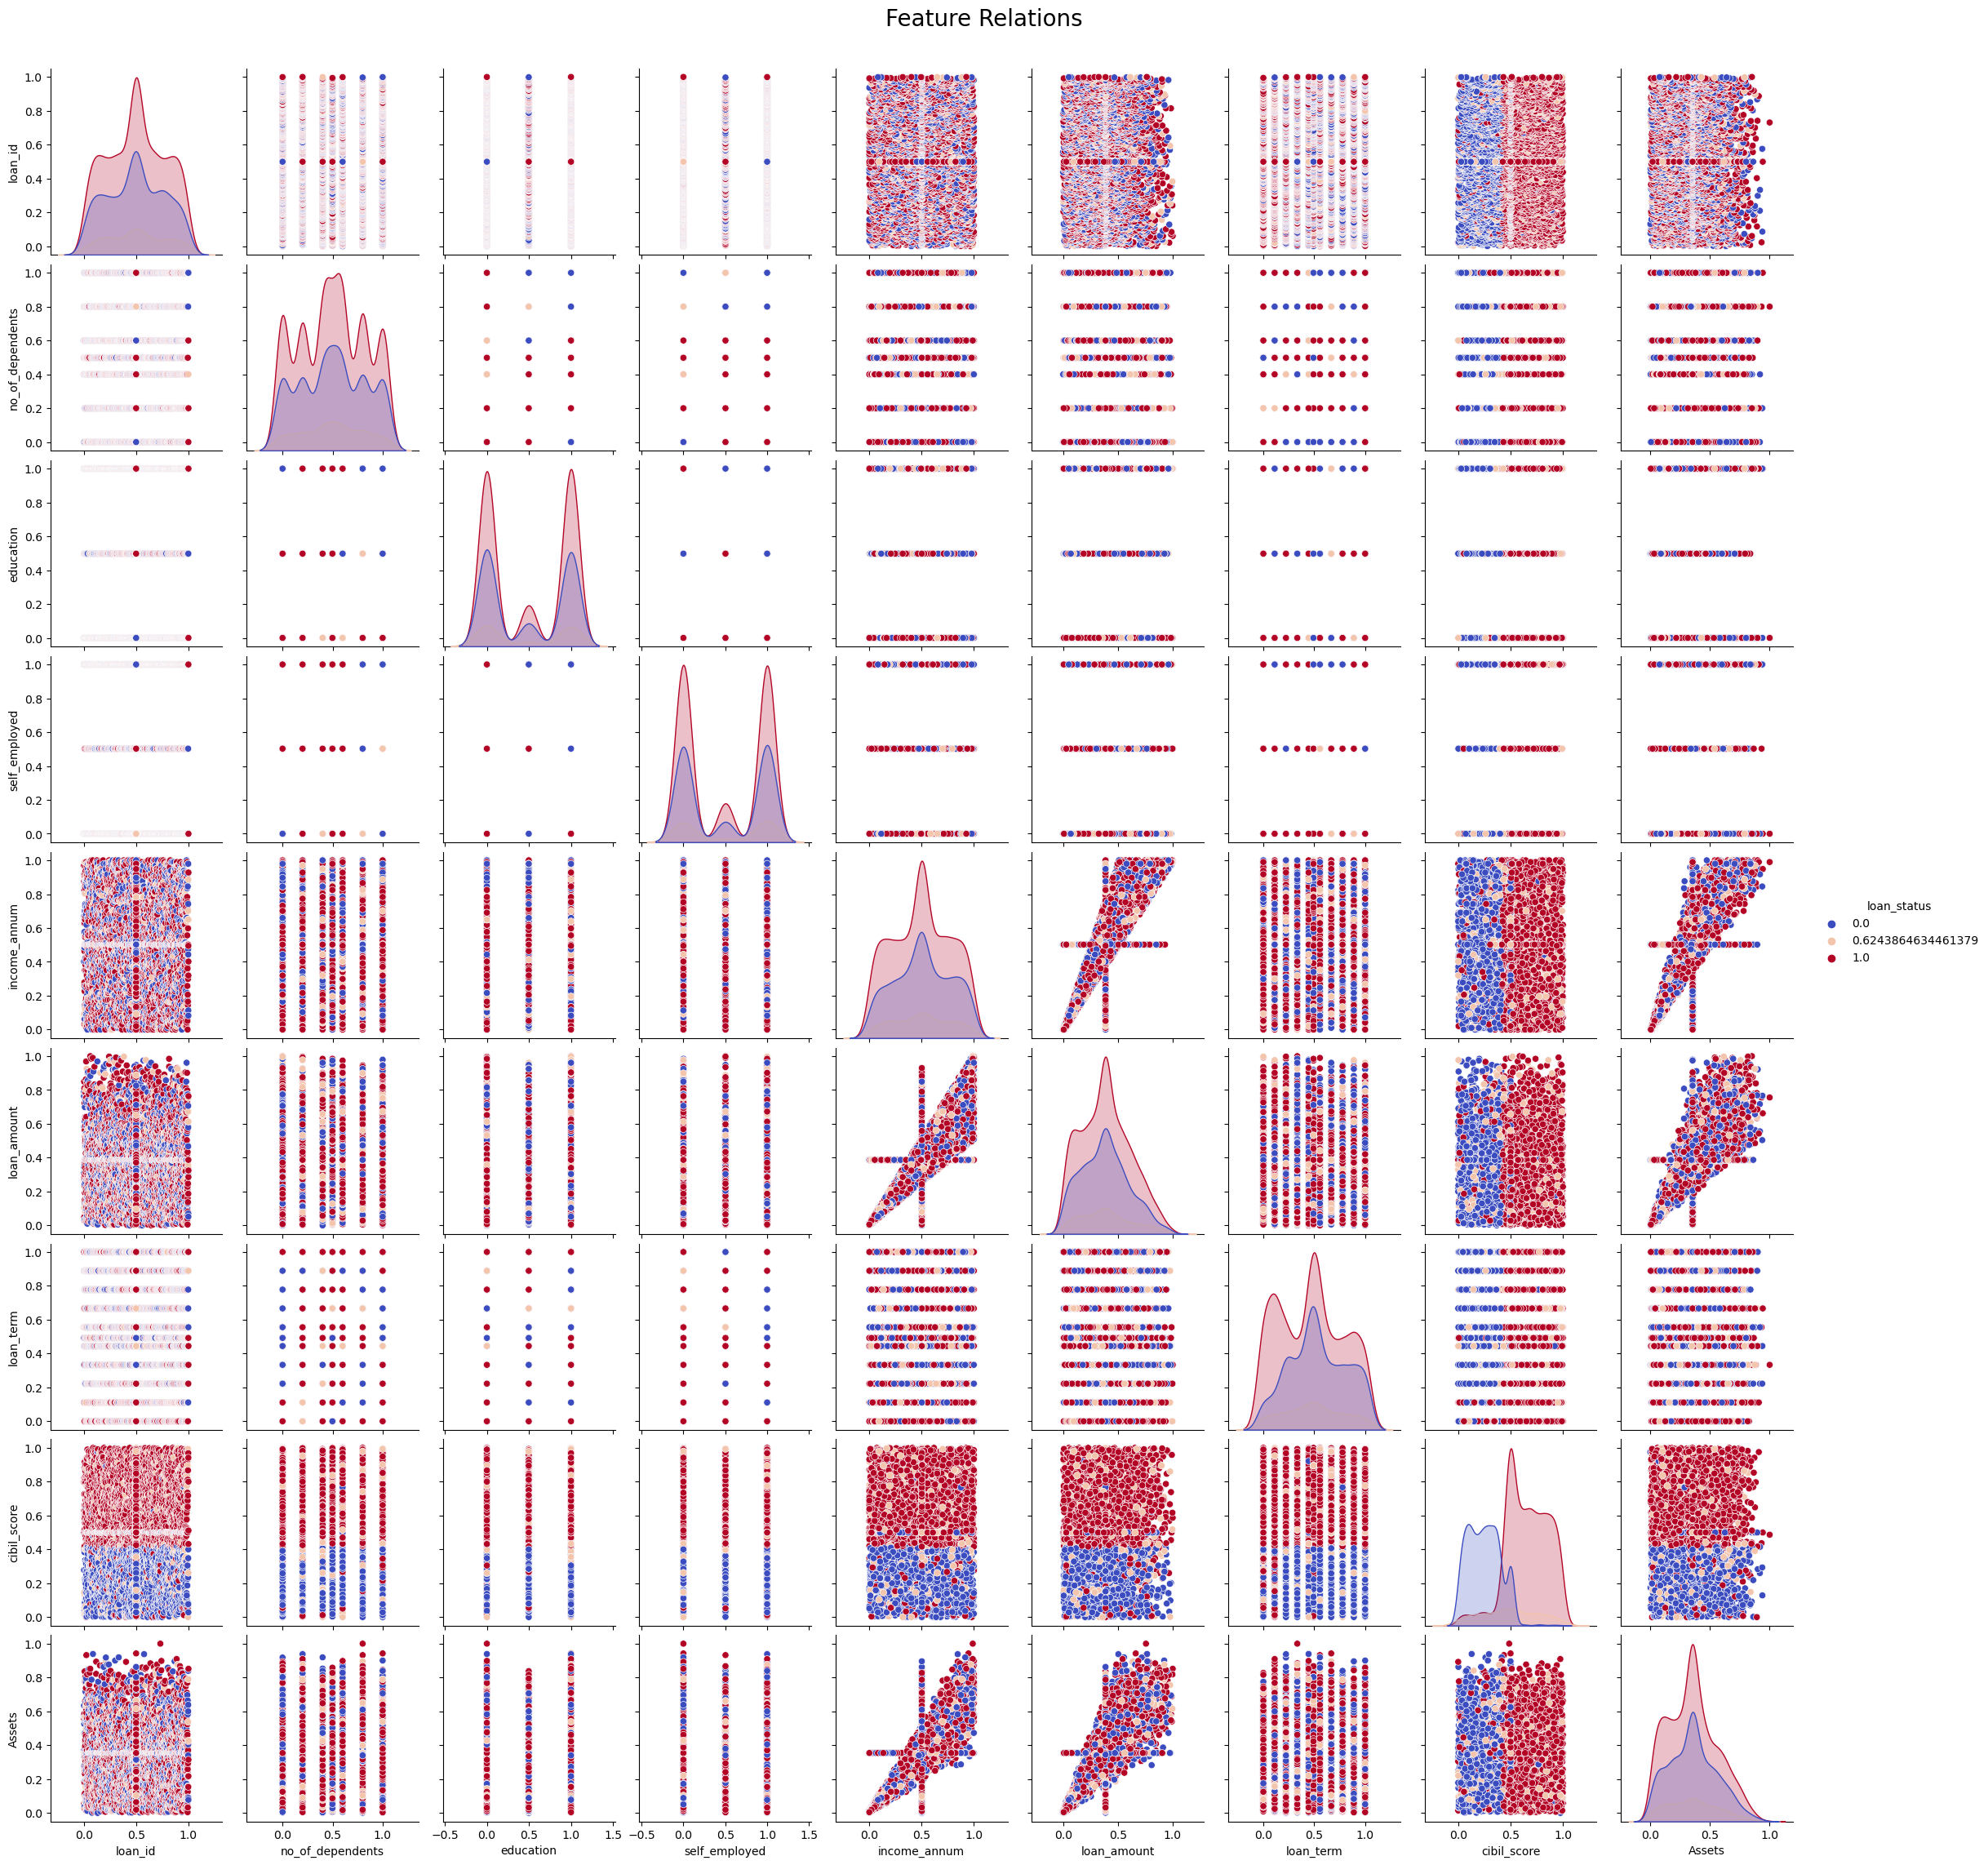

In [46]:

df = datasets[0]  
df.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

g1 = sns.pairplot(
    df[['loan_id', 'no_of_dependents', 'education', 'self_employed',
        'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
        'loan_status', 'Assets']], 
    hue='loan_status', 
    palette='coolwarm'
)

g1.fig.suptitle('Feature Relations', y=1.02, fontsize=20)
plt.show()


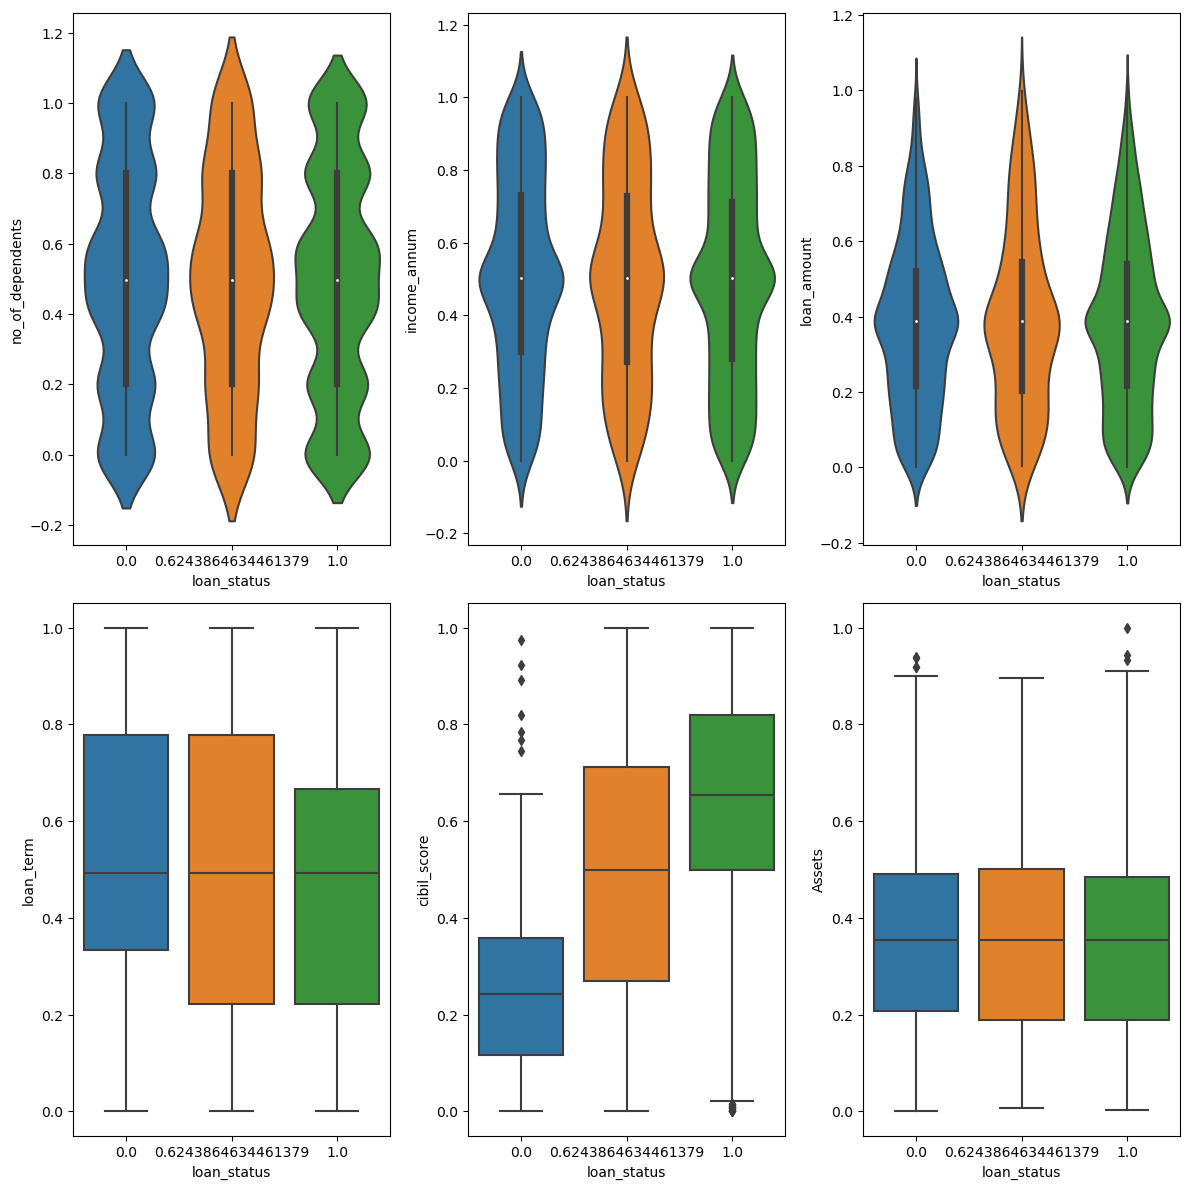

In [47]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=df, x='loan_status', y='no_of_dependents', ax=ax1)
sns.violinplot(data=df, x='loan_status', y='income_annum', ax=ax2)
sns.violinplot(data=df, x='loan_status', y='loan_amount', ax=ax3)
sns.boxplot(data=df, x='loan_status', y='loan_term', ax=ax4)
sns.boxplot(data=df, x='loan_status', y='cibil_score', ax=ax5)
sns.boxplot(data=df, x='loan_status', y='Assets', ax=ax6)

plt.tight_layout()
plt.show()


Importing Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import OneClassSVM
from sklearn.metrics import precision_score, recall_score,f1_score


Splitting the dataset into training and test set

In [50]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Finding f1_score, Accuracy, Precision, Recall for each Classifier(Model Training)

In [51]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')
print(f"SVM F1 Score: {svm_f1:.4f}")
print(f"SVM Precision: {svm_precision:.4f}")
print(f"SVM Recall: {svm_recall:.4f}")
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

SVM F1 Score: 0.9145
SVM Precision: 0.9152
SVM Recall: 0.9141
SVM Accuracy: 91.41%


In [52]:

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')
print(f"Decision Tree F1 Score: {dt_f1:.4f}")
print(f"Decision Tree Precision: {dt_precision:.4f}")
print(f"Decision Tree Recall: {dt_recall:.4f}")
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")


Decision Tree F1 Score: 0.9812
Decision Tree Precision: 0.9813
Decision Tree Recall: 0.9813
Decision Tree Accuracy: 98.13%


In [53]:

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
nb_precision = precision_score(y_test, y_pred_nb, average='weighted')
nb_recall = recall_score(y_test, y_pred_nb, average='weighted')
nb_f1 = f1_score(y_test, y_pred_nb, average='weighted')
print(f"Naïve Bayes F1 Score: {nb_f1:.4f}")
print(f"Naïve Bayes Precision: {nb_precision:.4f}")
print(f"Naïve Bayes Recall: {nb_recall:.4f}")
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naïve Bayes Accuracy: {nb_accuracy * 100:.2f}%")


Naïve Bayes F1 Score: 0.4899
Naïve Bayes Precision: 0.3998
Naïve Bayes Recall: 0.6323
Naïve Bayes Accuracy: 63.23%


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [54]:

one_class_model = OneClassSVM(kernel='rbf', nu=0.1, gamma=0.1)
one_class_model.fit(X_train_scaled)

y_pred_oc = one_class_model.predict(X_test_scaled)
y_pred_oc = np.where(y_pred_oc == -1, 0, 1)  # Convert -1 to 0 (outlier) and 1 to 1 (normal)
oc_precision = precision_score(y_test, y_pred_oc, average='weighted')
oc_recall = recall_score(y_test, y_pred_oc, average='weighted')
oc_f1 = f1_score(y_test, y_pred_oc, average='weighted')
print(f"One-Class SVM F1 Score: {oc_f1:.4f}")
print(f"One-Class SVM Precision: {oc_precision:.4f}")
print(f"One-Class SVM Recall: {oc_recall:.4f}")
oc_accuracy = accuracy_score(y_test, y_pred_oc)
print(f"One-Class SVM Accuracy: {oc_accuracy * 100:.2f}%")


One-Class SVM F1 Score: 0.5375
One-Class SVM Precision: 0.5459
One-Class SVM Recall: 0.6073
One-Class SVM Accuracy: 60.73%


In [55]:

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
knn_recall = recall_score(y_test, y_pred_knn, average='weighted')
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"K Nearest Neighbors F1 Score: {knn_f1:.4f}")
print(f"K Nearest Neighbors Precision: {knn_precision:.4f}")
print(f"K Nearest Neighbors: {knn_recall:.4f}")
print(f"K Nearest Neighbors Accuracy: {knn_accuracy * 100:.2f}%")


K Nearest Neighbors F1 Score: 0.8928
K Nearest Neighbors Precision: 0.8942
K Nearest Neighbors: 0.8923
K Nearest Neighbors Accuracy: 89.23%


In [56]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Random Forest F1 Score: {rf_f1:.4f}")
print(f"Random Forest Precision: {rf_precision:.4f}")
print(f"Random Forest Recall: {rf_recall:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")





Random Forest F1 Score: 0.9820
Random Forest Precision: 0.9820
Random Forest Recall: 0.9820
Random Forest Accuracy: 98.20%


In [57]:

nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model.fit(X_train_scaled, y_train)
y_pred_nn = nn_model.predict(X_test_scaled)

nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_precision = precision_score(y_test, y_pred_nn, average='weighted')
nn_recall = recall_score(y_test, y_pred_nn, average='weighted')
nn_f1 = f1_score(y_test, y_pred_nn, average='weighted')
print(f"Neural Network F1 Score: {nn_f1:.4f}")
print(f"Neural Network Precision: {nn_precision:.4f}")
print(f"Neural Network Recall: {nn_recall:.4f}")
print(f"Neural Network Accuracy: {nn_accuracy * 100:.2f}%")



Neural Network F1 Score: 0.9625
Neural Network Precision: 0.9626
Neural Network Recall: 0.9625
Neural Network Accuracy: 96.25%


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Ploting Model Accuracy Comparison

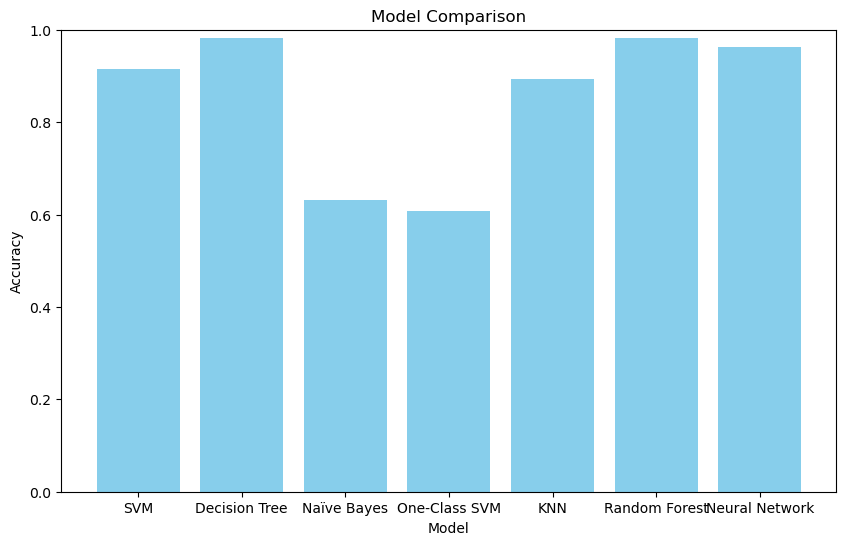

In [58]:

accuracies = {
    'SVM': svm_accuracy,
    'Decision Tree': dt_accuracy,
    'Naïve Bayes': nb_accuracy,
    'One-Class SVM': oc_accuracy,
    'KNN': knn_accuracy,
    'Random Forest': rf_accuracy,
    'Neural Network': nn_accuracy
}

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim([0, 1])
plt.show()


Ploting Bar Graph for all Aspects

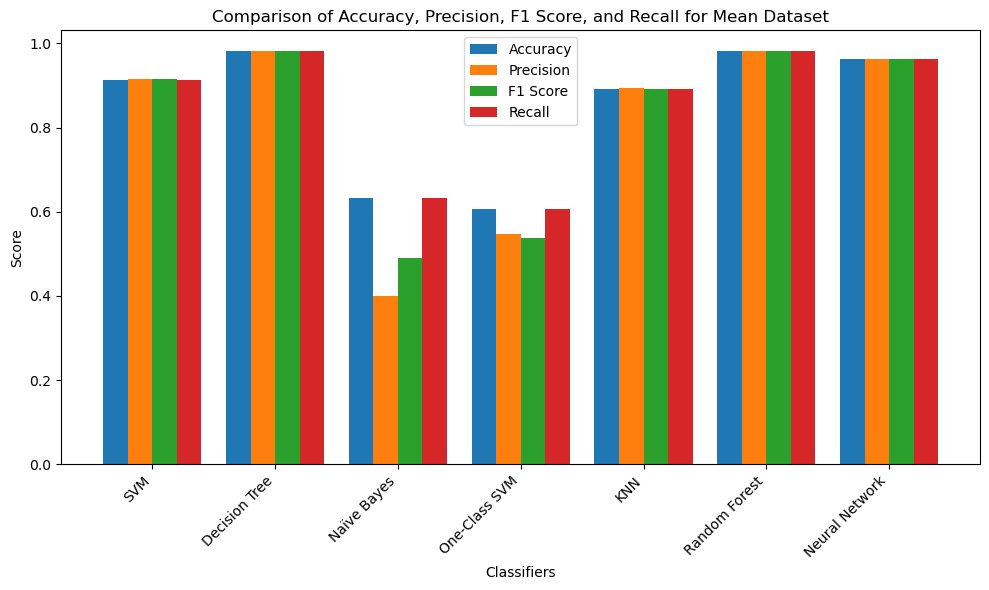

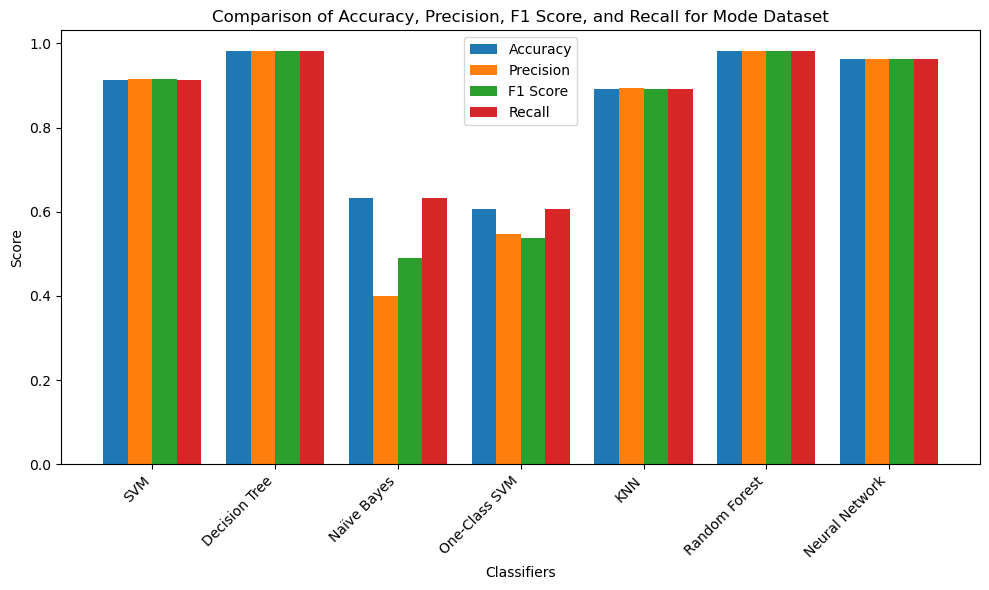

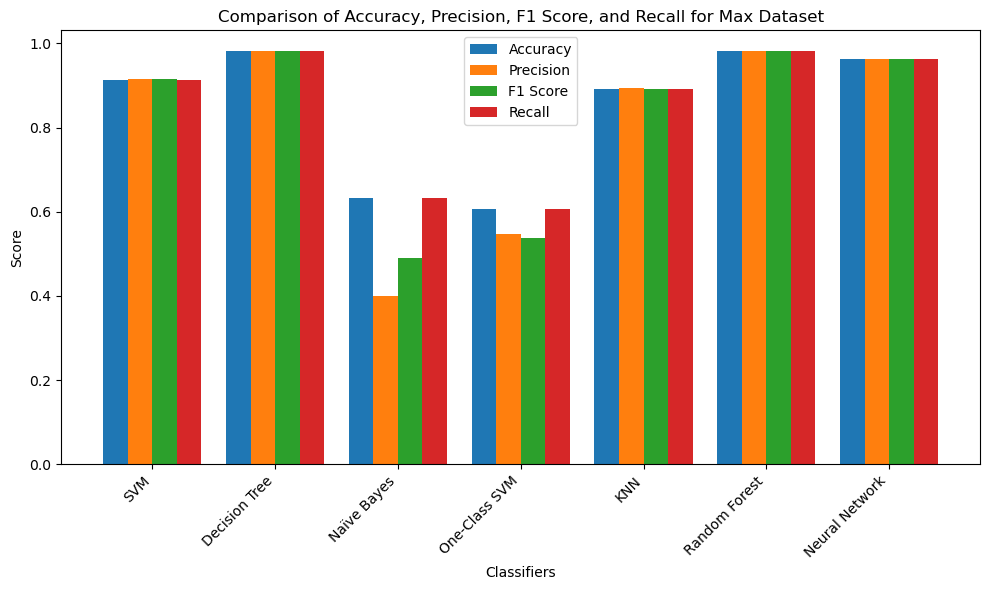

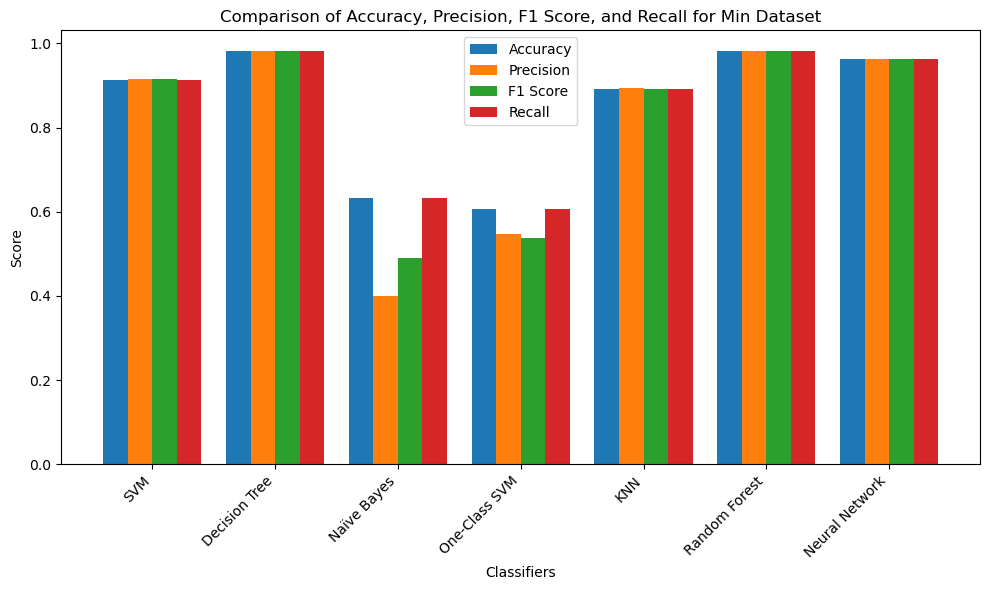

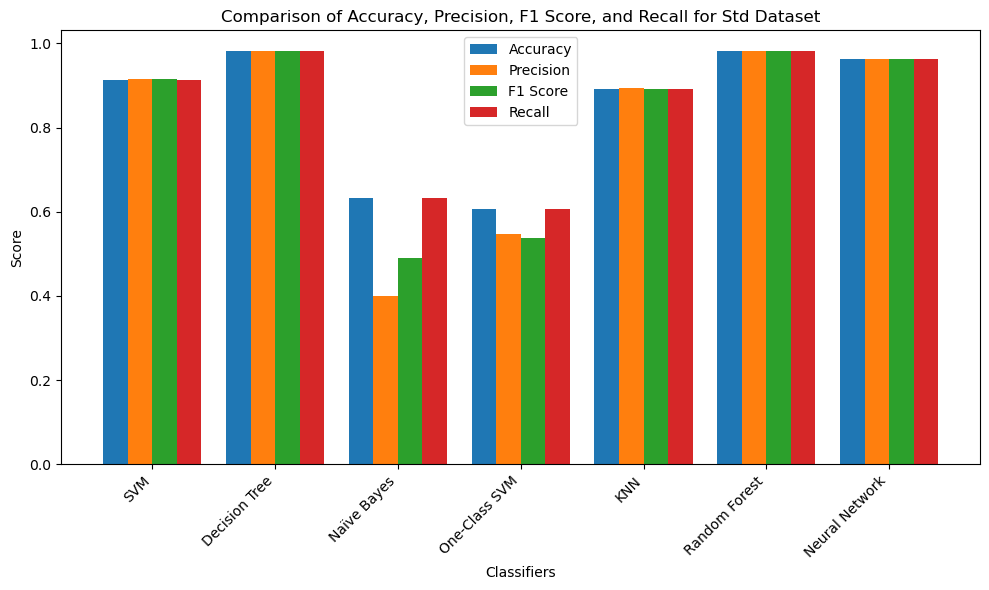

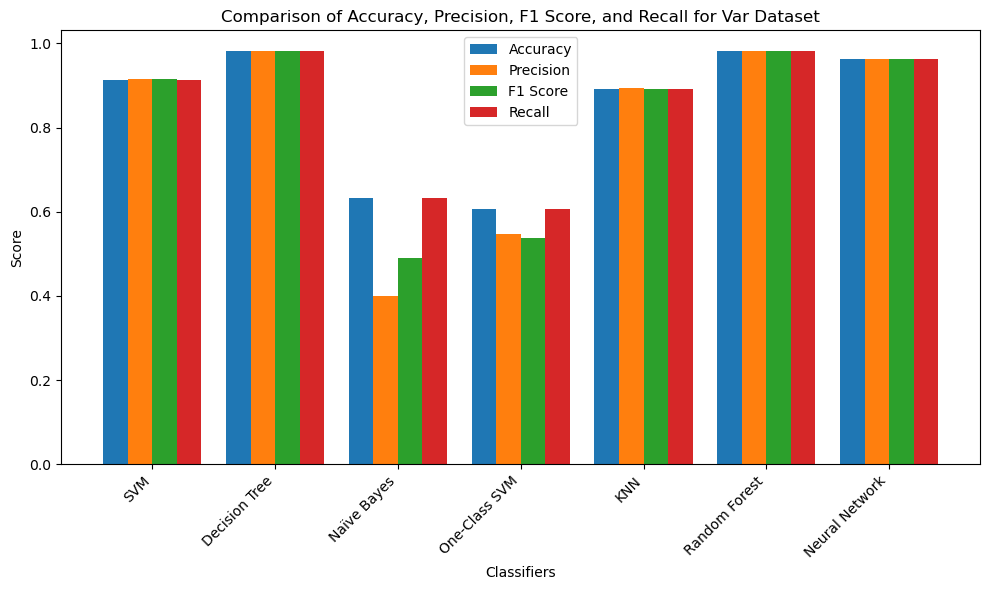

In [59]:

accuracies = {
    'SVM': svm_accuracy,
    'Decision Tree': dt_accuracy,
    'Naïve Bayes': nb_accuracy,
    'One-Class SVM': oc_accuracy,
    'KNN': knn_accuracy,
    'Random Forest': rf_accuracy,
    'Neural Network': nn_accuracy
}

precisions = {
    'SVM': svm_precision,
    'Decision Tree': dt_precision,
    'Naïve Bayes': nb_precision,
    'One-Class SVM': oc_precision,
    'KNN': knn_precision,
    'Random Forest': rf_precision,
    'Neural Network': nn_precision
}

f1_scores = {
    'SVM': svm_f1,
    'Decision Tree': dt_f1,
    'Naïve Bayes': nb_f1,
    'One-Class SVM': oc_f1,
    'KNN': knn_f1,
    'Random Forest': rf_f1,
    'Neural Network': nn_f1
}
recalls = {
    'SVM': svm_recall,
    'Decision Tree': dt_recall,
    'Naïve Bayes': nb_recall,
    'One-Class SVM': oc_recall,
    'KNN': knn_recall,
    'Random Forest': rf_recall,
    'Neural Network': nn_recall
}
dataset_names = ["Mean", "Mode", "Max", "Min", "Std", "Var"]
model_names = list(accuracies.keys())
def plot_for_dataset(dataset_name):
    fig, ax = plt.subplots(figsize=(10,6))

    x = np.arange(len(model_names))

    width = 0.2
    ax.bar(x - 1.5 * width, [np.mean(accuracies[model]) for model in model_names], width, label='Accuracy')
    ax.bar(x - 0.5 * width, [np.mean(precisions[model]) for model in model_names], width, label='Precision')
    ax.bar(x + 0.5 * width, [np.mean(f1_scores[model]) for model in model_names], width, label='F1 Score')
    ax.bar(x + 1.5 * width, [np.mean(recalls[model]) for model in model_names], width, label='Recall')

    ax.set_xlabel('Classifiers')
    ax.set_ylabel('Score')
    ax.set_title(f'Comparison of Accuracy, Precision, F1 Score, and Recall for {dataset_name} Dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45, ha="right")

    ax.legend()

    plt.tight_layout()
    plt.show()

for dataset in dataset_names:
    plot_for_dataset(dataset)


Unsupervised Learning